In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2

In [2]:
def datasets(PATH):
    labels = ['female','male']
    data =[]
    for i in range(2):
        PATH_NEW = PATH + labels[i] + "\\*"
        print(PATH)
        for img in glob.glob(PATH_NEW):
            img = cv2.imread(img)
            img = cv2.resize(img, (96,96))
            data.append((img,i))
    return data

In [3]:
train_dir = "D:\\Python online kurs\\CNN\Tensorflow\\Female_Male\Gender\\Train\\"
test_dir = "D:\\Python online kurs\\CNN\Tensorflow\\Female_Male\\Gender\\Test\\"

In [4]:
train_dataset = datasets(train_dir)
test_dataset = datasets(test_dir)

D:\Python online kurs\CNN\Tensorflow\Female_Male\Gender\Train\
D:\Python online kurs\CNN\Tensorflow\Female_Male\Gender\Train\
D:\Python online kurs\CNN\Tensorflow\Female_Male\Gender\Test\
D:\Python online kurs\CNN\Tensorflow\Female_Male\Gender\Test\


In [5]:
x_train,y_train = np.array([i[0] for i in train_dataset],dtype=np.uint8),np.array([i[1] for i in train_dataset],dtype=np.uint8)

In [6]:
print(x_train.shape)
print(y_train.shape)

(47009, 96, 96, 3)
(47009,)


In [7]:
x_test,y_test = np.array([i[0] for i in test_dataset],dtype=np.uint8),np.array([i[1] for i in test_dataset],dtype=np.uint8)

In [8]:
print(x_test.shape)
print(y_test.shape)

(11649, 96, 96, 3)
(11649,)


In [9]:
print("Train dataset")
print("IMGS :", len(train_dataset))
print("Female :", len([i for i in train_dataset if i[1]==0]))
print("Male :", len([i for i in train_dataset if i[1]==1]))

Train dataset
IMGS : 47009
Female : 23243
Male : 23766


In [10]:
print("Test dataset")
print("IMGS :", len(test_dataset))
print("Female :", len([i for i in test_dataset if i[1]==0]))
print("Male :", len([i for i in test_dataset if i[1]==1]))

Test dataset
IMGS : 11649
Female : 5841
Male : 5808


In [11]:
def Model():
    model = keras.Sequential([
        keras.layers.Conv2D(32,(3,3),input_shape=(96,96,3),activation='relu'),
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.Conv2D(64,(3,3),activation='relu'),
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.Conv2D(128,(3,3),activation='relu'),
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.Flatten(),
        keras.layers.Dense(64,activation='relu'),
        keras.layers.Dense(32,activation='relu'),
        keras.layers.Dense(1,activation='sigmoid')
    ])
    model.compile(optimizer = 'adam',loss='binary_crossentropy',metrics=['accuracy'])
    return model
    

In [12]:
with tf.device('/GPU:0'):
    model_gpu = Model()
    model_gpu.fit(x_test,y_test,epochs=5)

Epoch 1/5
365/365 [==============================] - 95s 257ms/step - loss: 0.9120 - accuracy: 0.8319
Epoch 2/5
365/365 [==============================] - 99s 272ms/step - loss: 0.2240 - accuracy: 0.9103
Epoch 3/5
365/365 [==============================] - 103s 282ms/step - loss: 0.1906 - accuracy: 0.9278
Epoch 4/5
365/365 [==============================] - 98s 270ms/step - loss: 0.1582 - accuracy: 0.9390
Epoch 5/5
365/365 [==============================] - 91s 249ms/step - loss: 0.2321 - accuracy: 0.9096


In [18]:
model_gpu.evaluate(x_test,y_test)

365/365 [==============================] - 29s 78ms/step - loss: 0.1618 - accuracy: 0.9379


[0.1618359088897705, 0.9379345774650574]

[[0.91295326]]


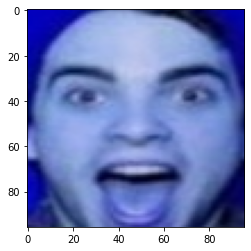

In [21]:
i = 8320
rasm = np.expand_dims(x_test[i],0)
print(model_gpu.predict(rasm))
plt.imshow(x_test[i])